In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

%matplotlib inline


In [2]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'data_set_citations.json'

In [3]:
df = pd.read_json(dirname+filename)
df['data_set_id'] = ['data_'+str(i) for i in df['data_set_id']]
df['publication_id'] = ['pub_'+str(i) for i in df['publication_id']]
df = df.drop('mention_list', axis=1)
df.head()

,data_set_id,publication_id,score
0,data_305,pub_103,0.264053
1,data_306,pub_103,0.429020
2,data_320,pub_103,0.374938
3,data_306,pub_104,0.293487
4,data_306,pub_106,0.343932


In [4]:
df.shape

(2925, 3)

In [5]:
df_visual = df.sample(frac=0.05, replace=True, random_state=1)

In [6]:
df_visual.shape

(146, 3)

In [194]:
G = nx.Graph()
G.add_weighted_edges_from(df_visual.values.tolist(),color='black')

In [195]:
dirname = 'data/competition-output/phase2-final/rcc-03/raw_results/holdout/output/'
filename = 'research_fields.json'

In [196]:
df_rf = pd.read_json(dirname+filename)
# df_rf['data_set_id'] = ['data_'+str(i) for i in df_rf['data_set_id']]
df_rf['publication_id'] = ['pub_'+str(i) for i in df_rf['publication_id']]
# df_rf = df_rf.drop('mention_list', axis=1)
df_rf.head(5)

,publication_id,research_field,score
0,pub_102,business:finance,0.96
1,pub_103,economics:finance,0.82
2,pub_104,economics:finance,0.97
3,pub_106,economics:finance,0.97
4,pub_107,business:finance,0.91


In [197]:
df_rf_visual = pd.merge(df_rf,df_visual , on='publication_id', how='inner')[['publication_id','research_field','score_x']]

In [198]:
set(df_rf_visual.research_field)

{u'business:criminology',
 u'business:education',
 u'business:finance',
 u'business:healthcare',
 u'economics:finance',
 u'economics:healthcare',
 u'medicine:education',
 u'medicine:finance',
 u'medicine:healthcare',
 u'sociology:criminology',
 u'sociology:education',
 u'sociology:finance',
 u'sociology:healthcare'}

In [199]:
G.add_weighted_edges_from(df_rf_visual.values.tolist(),color='blue')

In [200]:
df_ = df[df.data_set_id != 'data_438']

In [201]:
dataset_degrees_dict = {}
for dataset in df_visual.data_set_id:
    degree = G.degree(dataset)
    dataset_degrees_dict[dataset] = degree

dataset_degrees = [x for x in dataset_degrees_dict.values()]

In [14]:
pub_degrees_dict = {}
for pub in df_visual.publication_id:
    degree = G.degree(pub)
    pub_degrees_dict[pub] = degree

pub_degrees = [x for x in pub_degrees_dict.values()]

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
def plotDegreeDistribution(dataset_degrees, node_type = 'Dataset', ptype = 'density', figsize = (10,8), bins = 50):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))
    if ptype == 'density':
        sns.distplot(dataset_degrees, hist = True, bins = bins)
        plt.ylabel('Density')
        plt.xlabel('Degree')

    if ptype == 'count':
        plt.hist(dataset_degrees, bins = bins)
        plt.ylabel('Count')
        plt.xlabel('Degree')

    if ptype == 'box':
        sns.boxplot(dataset_degrees, orient = 'v')
        plt.ylabel('Degree')

    plt.title('{} Nodes Degree Distribution'.format(node_type))
    plt.show()

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


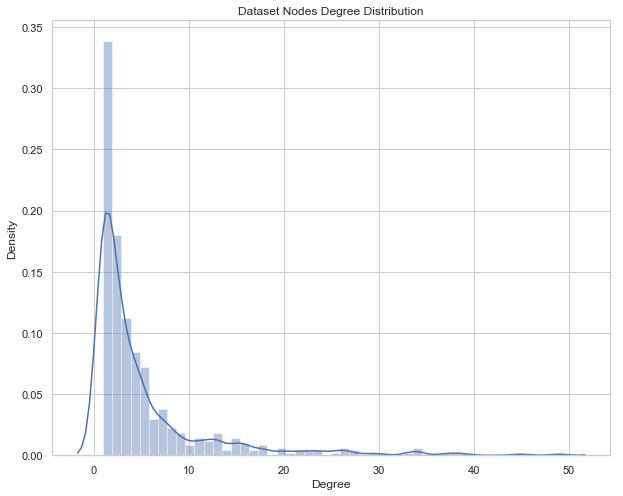

In [20]:
plotDegreeDistribution(dataset_degrees, node_type = 'Dataset', ptype = 'density', figsize = (10,8), bins = 50)





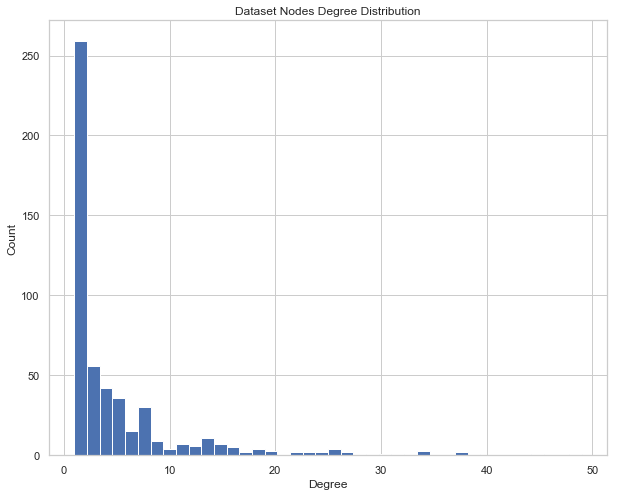

In [111]:
plotDegreeDistribution(dataset_degrees, node_type = 'Dataset', ptype = 'count', figsize = (10,8), bins = 40)

In [23]:
len(G.nodes())

5546

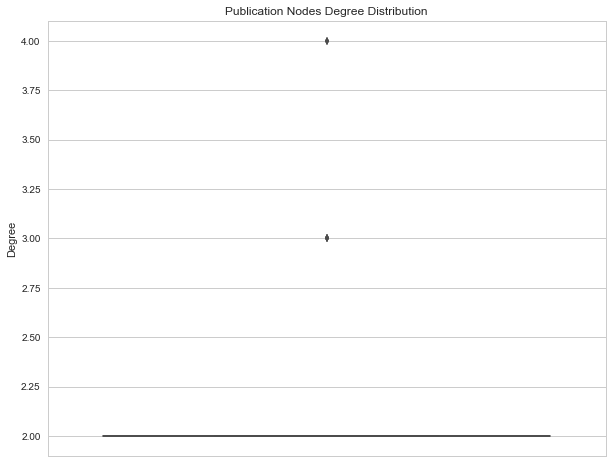

In [20]:
plotDegreeDistribution(pub_degrees, node_type = 'Publication', ptype = 'box', figsize = (10,8), bins = 50)

In [21]:
#Get research field to publications from df_rf
#then map datasets to research fields 
rf = sorted(df_rf_visual.research_field.unique())
rf_data_dict = {}
for field in rf:
    pubs = df_rf_visual[df_rf_visual.research_field == field].publication_id
    data_set = set()
    for pub in pubs:
        data = df_visual[df_visual.publication_id == pub].data_set_id
        for x in data:
            data_set.add(x)
    rf_data_dict[field] = data_set

In [22]:
rf_data_dict_count = {}
for key in rf_data_dict.keys():
    rf_data_dict_count[key] = len(rf_data_dict[key])

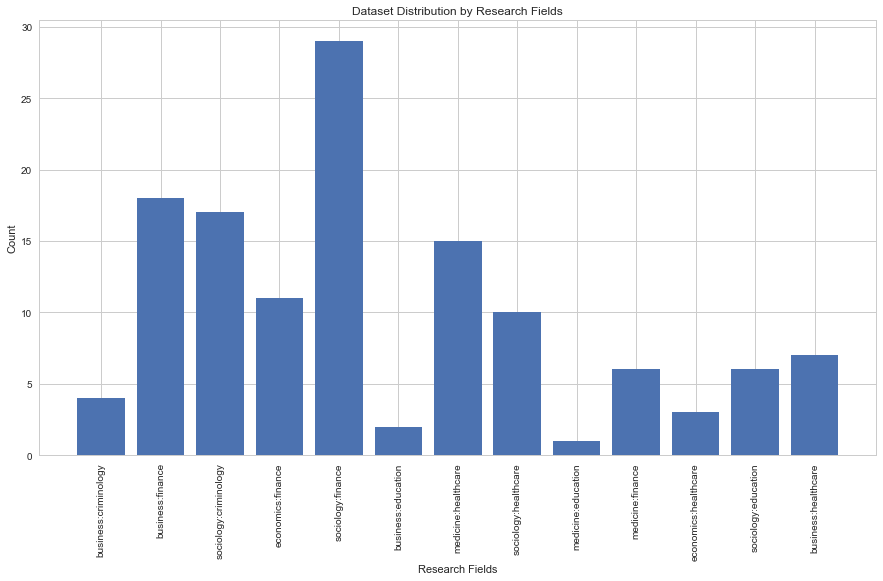

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8))
plt.bar(range(len(rf_data_dict_count)), list(rf_data_dict_count.values()), align='center')
plt.xticks(range(len(rf_data_dict_count)), list(rf_data_dict_count.keys()), rotation = 90)
plt.xlabel('Research Fields')
plt.ylabel('Count')
plt.title('Dataset Distribution by Research Fields')
plt.show()

In [24]:
randomseed = 4
pos = nx.spring_layout(G)

In [25]:
df_rf_visual.head()

,publication_id,research_field,score_x
0,pub_121,business:finance,0.89
1,pub_130,economics:finance,0.81
2,pub_138,business:finance,0.91
3,pub_2889,economics:finance,0.88
4,pub_3161,business:finance,0.87


In [26]:
def multiassign_x_y(d, keys, values):
    for k, v in zip(keys, values):
        d[k][0] = v 
        d[k][1] = d[k][1]*10

In [27]:
dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
rf_nodes_list = list(rf_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,rf_nodes_list,[0.8]*len(rf_nodes_list))



In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
'pub_9140' in pub_nodes_list

False

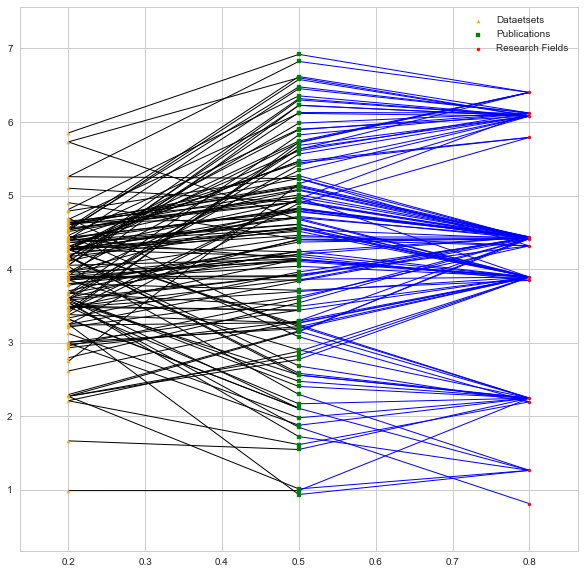

In [204]:
from matplotlib.patches import ConnectionStyle
plt.figure(figsize=(10,10))

dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = rf_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Research Fields')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()

description & keywords

In [36]:
dirname = 'data/'
filename = 'data_sets.json'
df_description = pd.read_json(dirname+filename)

In [66]:
dirname = 'data/'
filename = 'authorPub.csv'
authorPub = pd.read_csv(dirname+filename)

In [68]:
authorPub.dtypes

Unnamed: 0                  int64
AuthorId                    int64
DisplayName                object
LastKnownAffiliationId    float64
PaperCount                  int64
pdf_file_name              object
pub_date                   object
publication_id            float64
text_file_name             object
title                      object
unique_identifier          object
Doi                        object
dtype: object

In [44]:
df_description.dtypes

additional_keywords    object
citation               object
coverages              object
data_set_id             int64
date                   object
description            object
family_identifier      object
identifier_list        object
mention_list           object
methodology            object
name                   object
subjects               object
title                  object
unique_identifier      object
dtype: object

In [53]:
df_description.data_set_id = df_description.data_set_id.apply(lambda x: "data_"+str(x))

In [60]:
df_merged1 = df_visual.merge(df_description, on = "data_set_id")

In [131]:
df_subjects

,data_set_id,subjects
0,data_1135,"[adolescents, academic achievement, cognitive ..."
1,data_204,"[aptitude, career goals, drinking behavior, dr..."
2,data_665,"[assault, auto theft, burglary, crime, crime c..."
3,data_665,"[assault, auto theft, burglary, crime, crime c..."
4,data_665,"[assault, auto theft, burglary, crime, crime c..."
5,data_558,"[adolescents, attitudes, demographic character..."
6,data_1165,"[abortion, associations, beliefs, citizen atti..."
7,data_520,"[behavior problems, census data, child care, c..."
8,data_522,"[behavior problems, census data, child care, c..."
9,data_522,"[behavior problems, census data, child care, c..."


In [205]:
df_merged1 = df_merged1[['data_set_id','publication_id','description','subjects']]
df_subjects = df_merged1[['data_set_id','subjects']]
df_subjects.subjects = df_subjects.subjects.apply(lambda x: x.split(','))


# G.add_edges_from(keywordDict,color='yellow')

In [206]:
df_subjects.subjects[0][1]

u'academic achievement'

In [207]:
lil = df_subjects.subjects[0][0].split(' ')
lil[0]

u'adolescents'

In [208]:
subjects_list = []
keywords_nodes = set()
for idx,subjects in enumerate(df_subjects.subjects):
    for i in subjects:
        s = i.split(' ')
        subjects_list.append((df_subjects.data_set_id[idx], s[0]))
        keywords_nodes = keywords_nodes|set([s[0]])

G.add_edges_from(subjects_list,color='yellow')
pos = nx.spring_layout(G)

In [209]:
keywords_nodes

{u'',
 u'1800--1994',
 u'1816-01-01--2001-12-31',
 u'1961--1981',
 u'1966--1976',
 u'1966--1992',
 u'1968--1999',
 u'1971',
 u'1972--2010',
 u'1972--2014',
 u'1972--2016',
 u'1976--1999',
 u'1979--1987',
 u'1985',
 u'1986--2011',
 u'1987',
 u'1987--1993',
 u'1987--1994',
 u'1988',
 u'1988--1994',
 u'1988--1995',
 u'1989--1990',
 u'1991',
 u'1991--1994',
 u'1991--2006',
 u'1993',
 u'1993--1997',
 u'1993-10-13--1993-11-28',
 u'1994',
 u'1994--1997',
 u'1994--2001',
 u'1994--2008',
 u'1995',
 u'1995--1996',
 u'1995-01--1996-01',
 u'1996-03--1997-03',
 u'1997',
 u'1997--2000',
 u'1998',
 u'1998--1999',
 u'1999',
 u'1999--2000',
 u'1999--2008',
 u'2000',
 u'2000--2001',
 u'2000--2002',
 u'2000--2004',
 u'2000--2010',
 u'2001',
 u'2001--2003',
 u'2002',
 u'2003',
 u'2003-01-01--2003-12-31',
 u'2004',
 u'2004--2006',
 u'2004-01-01--2004-12-31',
 u'2004-04--2004-06',
 u'2005',
 u'2005--2006',
 u'2005--2007',
 u'2005-11-05--2005-12-07',
 u'2006',
 u'2007',
 u'2007--2011',
 u'2008',
 u'2009',
 u

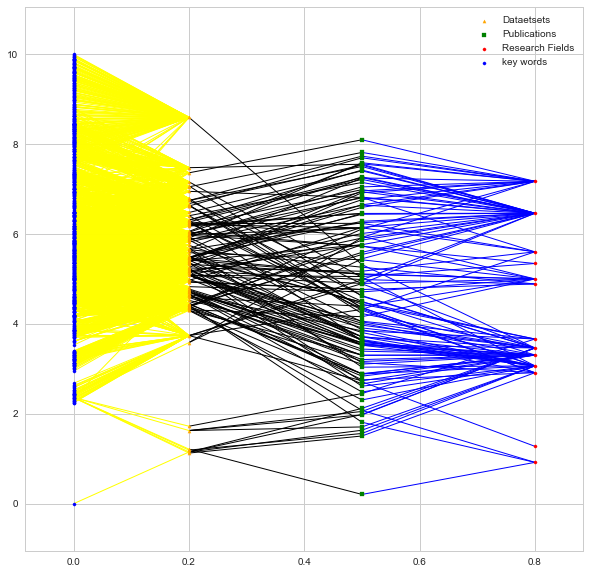

In [210]:
dataset_nodes = set(df_visual.data_set_id)
pub_nodes = set(df_visual.publication_id)
rf_nodes = set(df_rf_visual.research_field)

dataset_nodes_list = list(dataset_nodes)
pub_nodes_list = list(pub_nodes)
rf_nodes_list = list(rf_nodes)
keywords_nodes_list = list(keywords_nodes)

multiassign_x_y(pos,dataset_nodes_list,[0.2]*len(dataset_nodes_list))
multiassign_x_y(pos,pub_nodes_list,[0.5]*len(pub_nodes_list))
multiassign_x_y(pos,rf_nodes_list,[0.8]*len(rf_nodes_list))
multiassign_x_y(pos,keywords_nodes_list,[0]*len(keywords_nodes_list))



from matplotlib.patches import ConnectionStyle
plt.figure(figsize=(10,10))

# dataset_nodes = set(df_visual.data_set_id)
# pub_nodes = set(df_visual.publication_id)
# rf_nodes = set(df_rf_visual.research_field)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

nx.draw_networkx_nodes(G, nodelist = dataset_nodes, node_shape = '^', node_color = 'orange',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Dataetsets')
nx.draw_networkx_nodes(G, nodelist = pub_nodes, node_shape = 's', node_color = 'green',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Publications')
nx.draw_networkx_nodes(G, nodelist = rf_nodes, node_shape = 'o', node_color = 'red',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'Research Fields')
nx.draw_networkx_nodes(G, nodelist = keywords_nodes, node_shape = 'o', node_color = 'blue',edge_color=colors, node_size = 10, pos=pos, with_labels = False, label = 'key words')
# # nx.draw_networkx_labels(nx.Graph(label_pos), pos=label_pos)
nx.draw_networkx_edges(G, pos=pos,edge_color=colors)


plt.legend()

In [31]:
dataset_id_sorted = sorted(df.data_set_id.unique(), key = lambda x: int(x.split('_')[1]))
dataset_dis_matrix = np.array([[None]*len(dataset_id_sorted) for x in range(len(dataset_id_sorted))])
dataset_dis_matrix

array([[None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       ..., 
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None]], dtype=object)

In [32]:
import time

from networkx.algorithms.connectivity import local_node_connectivity

start_time = time.clock()

num_dataset = len(dataset_id_sorted)

for row in range(num_dataset):
    for col in range(num_dataset):
        try:
            dataset_dis_matrix[row][col] = len(nx.shortest_path(G, dataset_id_sorted[row], dataset_id_sorted[col]))-1
        except:
            dataset_dis_matrix[row][col] = 4
    if row%50 == 0:
        print("Now at row {}, time passed: {}".format(row, time.clock()-start_time))
            
print("Finished")
print("Total Run Time: ", time.clock()-start_time)

Now at row 0, time passed: 0.02757
Now at row 50, time passed: 0.248
Now at row 100, time passed: 0.530407
Now at row 150, time passed: 0.876442
Now at row 200, time passed: 1.136919
Now at row 250, time passed: 1.437663
Now at row 300, time passed: 1.667587
Now at row 350, time passed: 1.889827
Now at row 400, time passed: 2.164134
Now at row 450, time passed: 2.412219
Now at row 500, time passed: 2.728944
Finished
('Total Run Time: ', 2.8430690000000003)


In [33]:
df_matrix = pd.DataFrame(dataset_dis_matrix, columns = dataset_id_sorted, index = dataset_id_sorted)
df_matrix.head(10)


,data_39,data_40,data_42,data_44,data_45,data_46,data_47,data_48,data_49,data_50,...,data_2449,data_2601,data_3579,data_4362,data_4745,data_6742,data_7012,data_8018,data_8304,data_9424
data_39,0,4,4,4,8,4,4,4,8,4,...,4,4,4,4,4,4,4,4,4,4
data_40,4,0,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
data_42,4,4,0,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
data_44,4,4,4,0,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
data_45,8,4,4,4,0,4,4,4,8,4,...,4,4,4,4,4,4,4,4,4,4
data_46,4,4,4,4,4,0,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
data_47,4,4,4,4,4,4,0,4,4,4,...,4,4,4,4,4,4,4,4,4,4
data_48,4,4,4,4,4,4,4,0,4,4,...,4,4,4,4,4,4,4,4,4,4
data_49,8,4,4,4,8,4,4,4,0,4,...,4,4,4,4,4,4,4,4,4,4
data_50,4,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,4,4,4,4,4


NameError: name 'ticks' is not defined

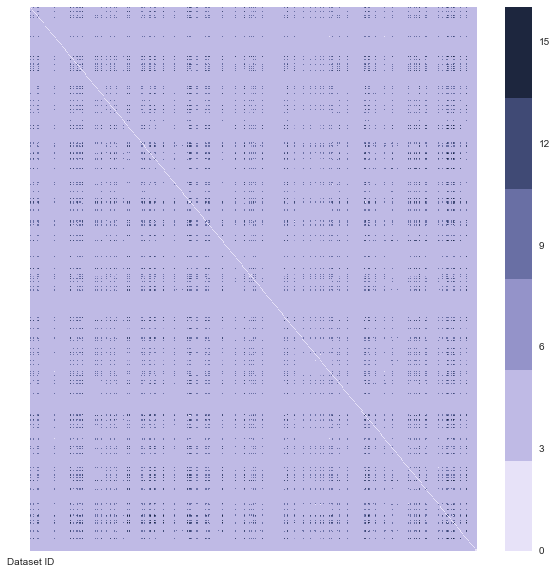

In [35]:
plt.figure(figsize = (10,10))
cmap = sns.cubehelix_palette(start=2.8, rot=.1, light=0.9, n_colors=6)
ax = sns.heatmap(df_matrix[df_matrix.columns].astype(float), cmap = cmap, xticklabels = ['Dataset ID'], yticklabels = False)
colorbar = ax.collections[0].colorbar
colorbar.set_ticks(ticks)
colorbar.set_ticklabels(['0', '2', '4', '6', '8', '10'])

In [ ]:
df_matrix.head()

In [ ]:
dist = [dataset_dis_matrix[i][i+1:] for i in range(len(dataset_dis_matrix))]
dist_flattened = []
for array in dist:
    for item in array:
        dist_flattened.append(item)

In [ ]:
plotDegreeDistribution(dist_flattened, node_type='Link Distance between Dataset')

In [ ]:
df_rf.head()

In [ ]:
dataset_degrees_dict, 

In [ ]:
G